<a href="https://colab.research.google.com/github/Souhib-khalbous/Quantitative-Analysis-of-T2-Coronal-MRI-Data-for-Treatment-Efficiency-in-Uterine-Fibroids-/blob/master/T2_Coronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Your Data**

In [ ]:
#Mount Google Drive when you are using Cloab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing The Usage Libraries** 📂

*   Importing Libraries
*   Reading Data
*   Droping the NOT useful Data

In [ ]:
#Libraries that alwyas we use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
#auc: to calculate the
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr #for Correlation

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #StandardScaler for Normaliztion.

#to train the data by DT
from sklearn.tree import DecisionTreeClassifier


################################################################################
#Read the Data
Given_Data = pd.read_excel('/content/drive/MyDrive/IHIRC2/T2_Coronal_One Roi_Center Slice_1.xlsx')

#Dropping the unnecessary columns
Given_Data = Given_Data.dropna(axis=1)
Given_Data =  Given_Data.drop(['Patient_info', 'Myometrium-1_Av', 'Myometrium-2_Av', 'Muscle-1_Av', 'Muscle-2_Av','KESERCI', 'NPV_Q1_Final', 'NPV_Q2_Final','NPV_Q3_Final','NPV_Q4_Final', 'FUNAKI', 'NPV' ],axis= 1)

#converting the Last column into integer insted of being a string
Given_Data['NPV_INTER_90'] = Given_Data['NPV_INTER_90'].apply(lambda x: 1 if x == '>90' else 0)



# **Data After Proccessing** 🔂

In [ ]:
#Remember: The head function for the following lines. JUST the last line will be excecuted.
Given_Data.head()

,Fibroid_Av,Fibroid_Av_ratio_Myometrium-1_Av,Fibroid_Av_ratio_Myometrium-2_Av,Fibroid_Av_ratio_Muscle-1_Av,Fibroid_Av_ratio_Muscle-2_Av,NPV_INTER_90
0,246.6,0.568989,0.627321,3.086358,3.889590,1
1,51.5,1.066253,0.905097,1.900369,2.258772,1
2,89.0,0.815018,0.560453,1.437803,4.120370,1
3,53.2,0.536290,0.302445,1.886525,1.303922,1
4,90.0,0.879765,1.243953,5.806452,3.225806,1


# **Dividing the Data**

* Separating the Features & the Target (Y).
* Encoding the target (Y).
* Splitting the Data into Training & Test sets.

In [ ]:
#In case you have just a single DATA FRAME
# Separate the features (X) and target variable (Y) for DATA 1
X=Given_Data.iloc[:,:-1 ]
Y=Given_Data.iloc[:,-1]

X.head(10)
Y.head(10)

# Perform one-hot encoding on the target variable
Y = pd.get_dummies(Y, drop_first=True)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.head()
#####################################################################################

,Fibroid_Av,Fibroid_Av_ratio_Myometrium-1_Av,Fibroid_Av_ratio_Myometrium-2_Av,Fibroid_Av_ratio_Muscle-1_Av,Fibroid_Av_ratio_Muscle-2_Av
73,29.8,1.683616,0.798928,1.610811,2.483333
61,28.3,0.234078,0.228410,1.286364,1.155102
55,16.0,0.583942,0.465116,3.809524,1.882353
40,192.6,1.059989,0.603194,1.882698,1.457986
9,398.8,0.512004,0.506348,2.777159,4.132642


In [ ]:
print(Given_Data.shape)
# Check the shape of the dataframes
print("\nShape of x_train:", x_train.shape)
print("\nShape of x_test:", x_test.shape)

(79, 6)

Shape of x_train: (63, 5)

Shape of x_test: (16, 5)


# **Correlation** **Matrix**: 1️⃣>= X >= ➖1️⃣

* Create the Correlation Matrix.
* Plotting the Correlation Matrix.

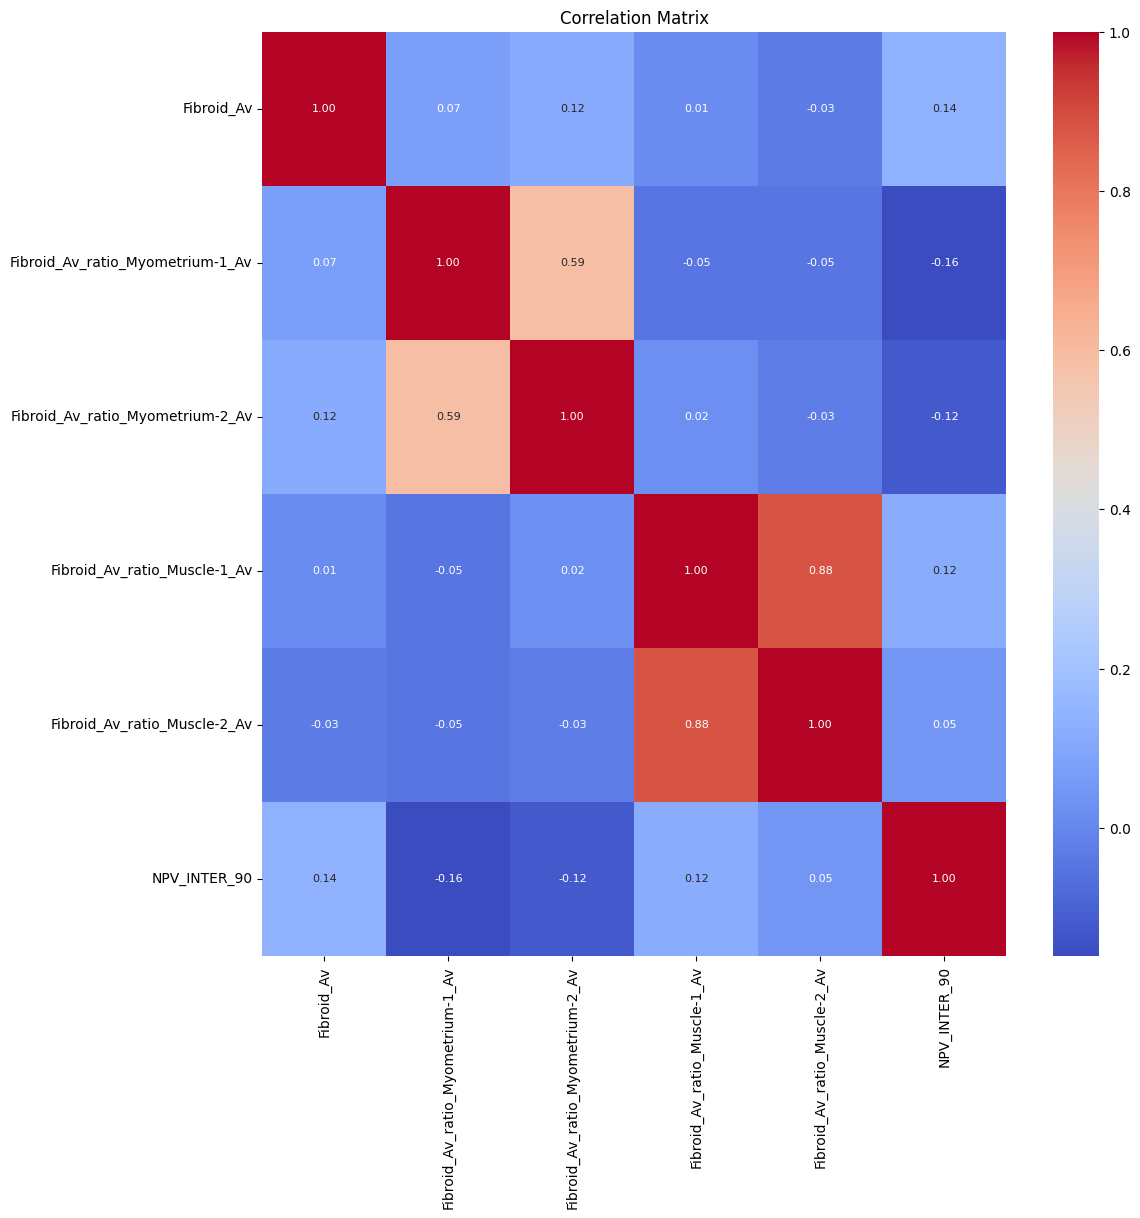

In [ ]:
# Calculate correlation matrix
correlation_matrix = Given_Data.corr()

#Plot correlation matrix
plt.figure(figsize=(12, 12))  # Increase the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})  # Increase font size of annotations
plt.title('Correlation Matrix')
plt.savefig('/content/drive/MyDrive/IHIRC2.pdf', dpi=300, bbox_inches='tight')
plt.show()

##############################################################################################################

# **Augmantation Data**

In [ ]:
# Assuming 'Given_Data' is your original DataFrame
original_data = Given_Data.copy()

# Define a function to perform data augmentation
def augment_data(data, num_samples=100):
    augmented_samples = []

    for _ in range(num_samples):
        # Randomly select a row from the original data
        original_sample = data.sample(n=1)

        # Apply some augmentation operation
        augmented_sample = original_sample.copy()

        # For example, add some random noise to a feature
        noise = np.random.normal(0, 0.1, size=len(augmented_sample.columns) - 1)
        augmented_sample.iloc[:, :-1] += noise

        augmented_samples.append(augmented_sample)

    # Concatenate the augmented samples with the original data
    augmented_data = pd.concat([data] + augmented_samples, ignore_index=True)

    return augmented_data

# Augment your data with 1000 synthetic samples (you can adjust the number)
augmented_data = augment_data(original_data, num_samples=100)

# Now 'augmented_data' contains your original data plus synthetic samples


# **Normalizing the Features:**💢


In [ ]:
# Normalize the features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
###################################

#RF model:
# Create a Random Forest Classifier
classifier = RandomForestClassifier(random_state= 50, n_estimators=100)

# Fit each classifier to its respective training data
classifier.fit(x_train, y_train)

###################################
#DT model:

# Create a Decision Tree classifier instance (you can set hyperparameters here)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)  # You can set other hyperparameters as needed

# Train the Decision Tree classifier on the training data
decision_tree_classifier.fit(x_train, y_train)


#########
#####################################################################################################

<ipython-input-8-c1c47b6f11e6>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

# **Feature Importance** *✈*

---


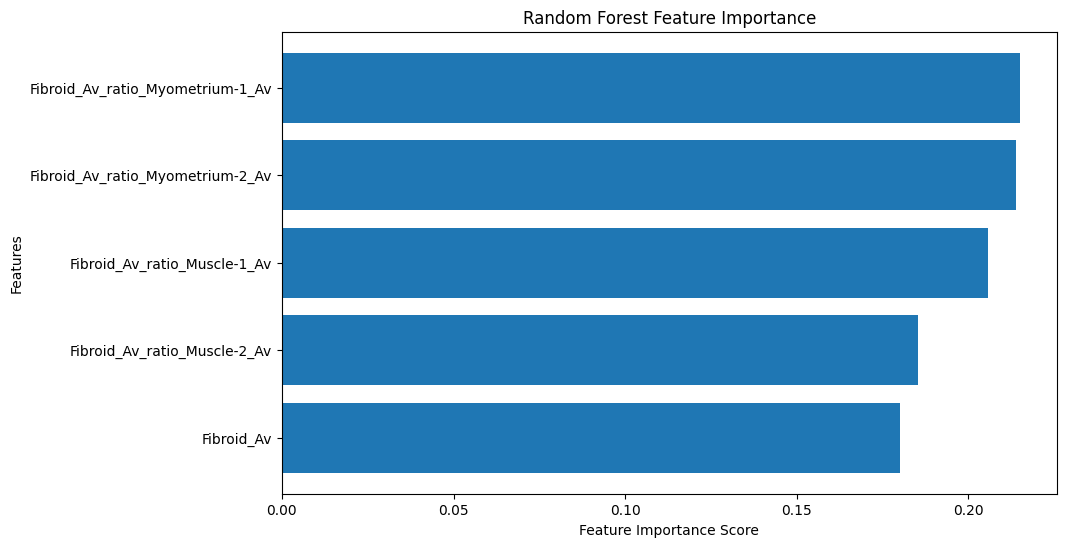

In [ ]:

# Get feature importances from your Random Forest model
feature_importances = classifier.feature_importances_

# Extract feature names or columns from your dataset
feature_names = Given_Data.columns


feature_importance_dict = dict(zip(feature_names, feature_importances))


# Sort the features by importance, with the most important ones first
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the importance scores for visualization
importance_scores = [x[1] for x in sorted_features]


# Extract the top N feature names (N is the number of importance scores)
top_feature_names = [x[0] for x in sorted_features]


# Create a horizontal bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, importance_scores)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()



# **HyperParameters Grid**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Try different values for the number of trees
    'max_depth': [None, 10, 20, 30],  # Try different values for the maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Try different values for minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Try different values for minimum samples in a leaf node
}

# Create a grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on your test data
accuracy = best_rf_model.score(x_test, y_test)
print("Test Accuracy with Best Model:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Test Accuracy with Best Model: 0.75


In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of x_train: (71, 5)
Shape of x_test: (8, 5)


# **ROC & AUC for the Classifier's Predictions:**

*   Generating a Receiver Operating Characteristic (ROC) curve
*   calculating the Area Under the Curve (AUC) for the Classifier's predictions.

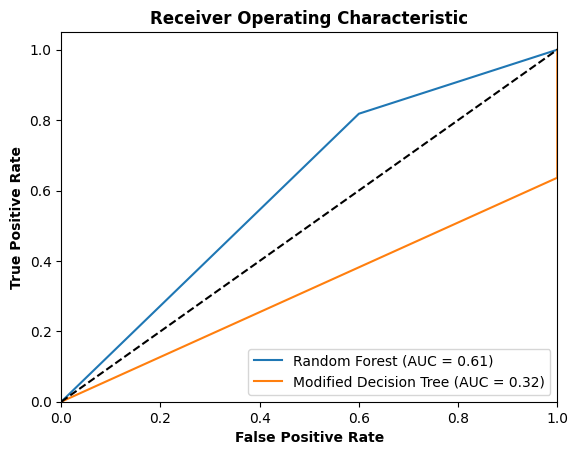

In [ ]:
#RF
y_pred = classifier.predict(x_test)  # Predict probabilities of positive class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')



####################################################################################################
#DT:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Create a DecisionTreeClassifier with modified min_samples_split
dt_classifier = DecisionTreeClassifier(min_samples_split=5, random_state=0)

# Fit the modified model to your training data
dt_classifier.fit(x_train, y_train)  # Replace x_train and y_train with your training data

# Predict probabilities on the test data using the modified model
y_pred_dt = dt_classifier.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC for the modified Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for the modified Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f'Modified Decision Tree (AUC = {roc_auc_dt:.2f})')



####################################################################################################


# Set plot properties
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('Receiver Operating Characteristic', fontweight='bold')
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"#The first dataset#\naccuracy is: {accuracy}\nPrecision is: {precision}\nrecall is: {recall}\nf1 is: {f1}\n\n")

###############################################
# accuracy1 = accuracy_score(y_test1, y_pred1)
# precision1 = precision_score(y_test1, y_pred1)
# recall1 = recall_score(y_test1, y_pred1)
# f1_1 = f1_score(y_test1, y_pred1)
# print(f"#The second dataset#\naccuracy is: {accuracy1}\nPrecision is: {precision1}\nrecall is: {recall1}\nf1 is: {f1_1}\n\n")

# ###############################################
# accuracy2 = accuracy_score(y_test2, y_pred2)
# precision2 = precision_score(y_test2, y_pred2)
# recall2 = recall_score(y_test2, y_pred2)
# f1_2 = f1_score(y_test2, y_pred2)
# print(f"#The Third dataset#\naccuracy is: {accuracy2}\nPrecision is: {precision2}\nrecall is: {recall2}\nf1 is: {f1_2}")


#The first dataset#
accuracy is: 0.5
Precision is: 0.42857142857142855
recall is: 1.0
f1 is: 0.6






```
# This is formatted as code
```

# **Confusion Matrix**

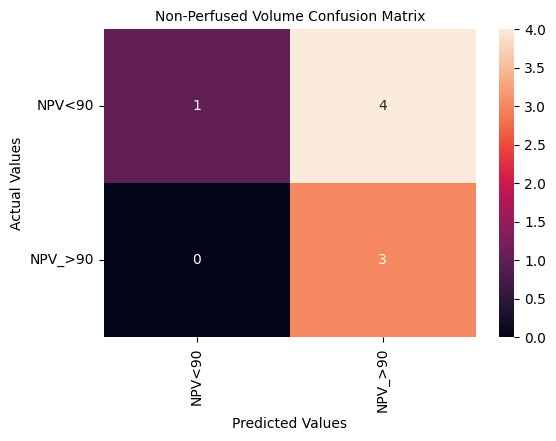

In [ ]:
#Confusion Matrix

labels = ["NPV<90","NPV_>90" ]
class_names = labels
matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(6, 4))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted Values', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('Actual Values', fontsize=10)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Non-Perfused Volume Confusion Matrix', fontsize=10)
plt.show()

############################################################


In [ ]:
# Assuming you have a scikit-learn model or dataset
from sklearn.datasets import load_iris

# Assuming you have a dataset named Given_Data
# Replace Given_Data with your actual dataset

# Get the feature names
feature_names = Given_Data.columns.tolist()  # Assuming your data is in a pandas DataFrame

# Print the feature names
print(feature_names)



['Fibroid_Av', 'Fibroid_Av_ratio_Myometrium-1_Av', 'Fibroid_Av_ratio_Myometrium-2_Av', 'Fibroid_Av_ratio_Muscle-1_Av', 'Fibroid_Av_ratio_Muscle-2_Av', 'NPV_INTER_90']


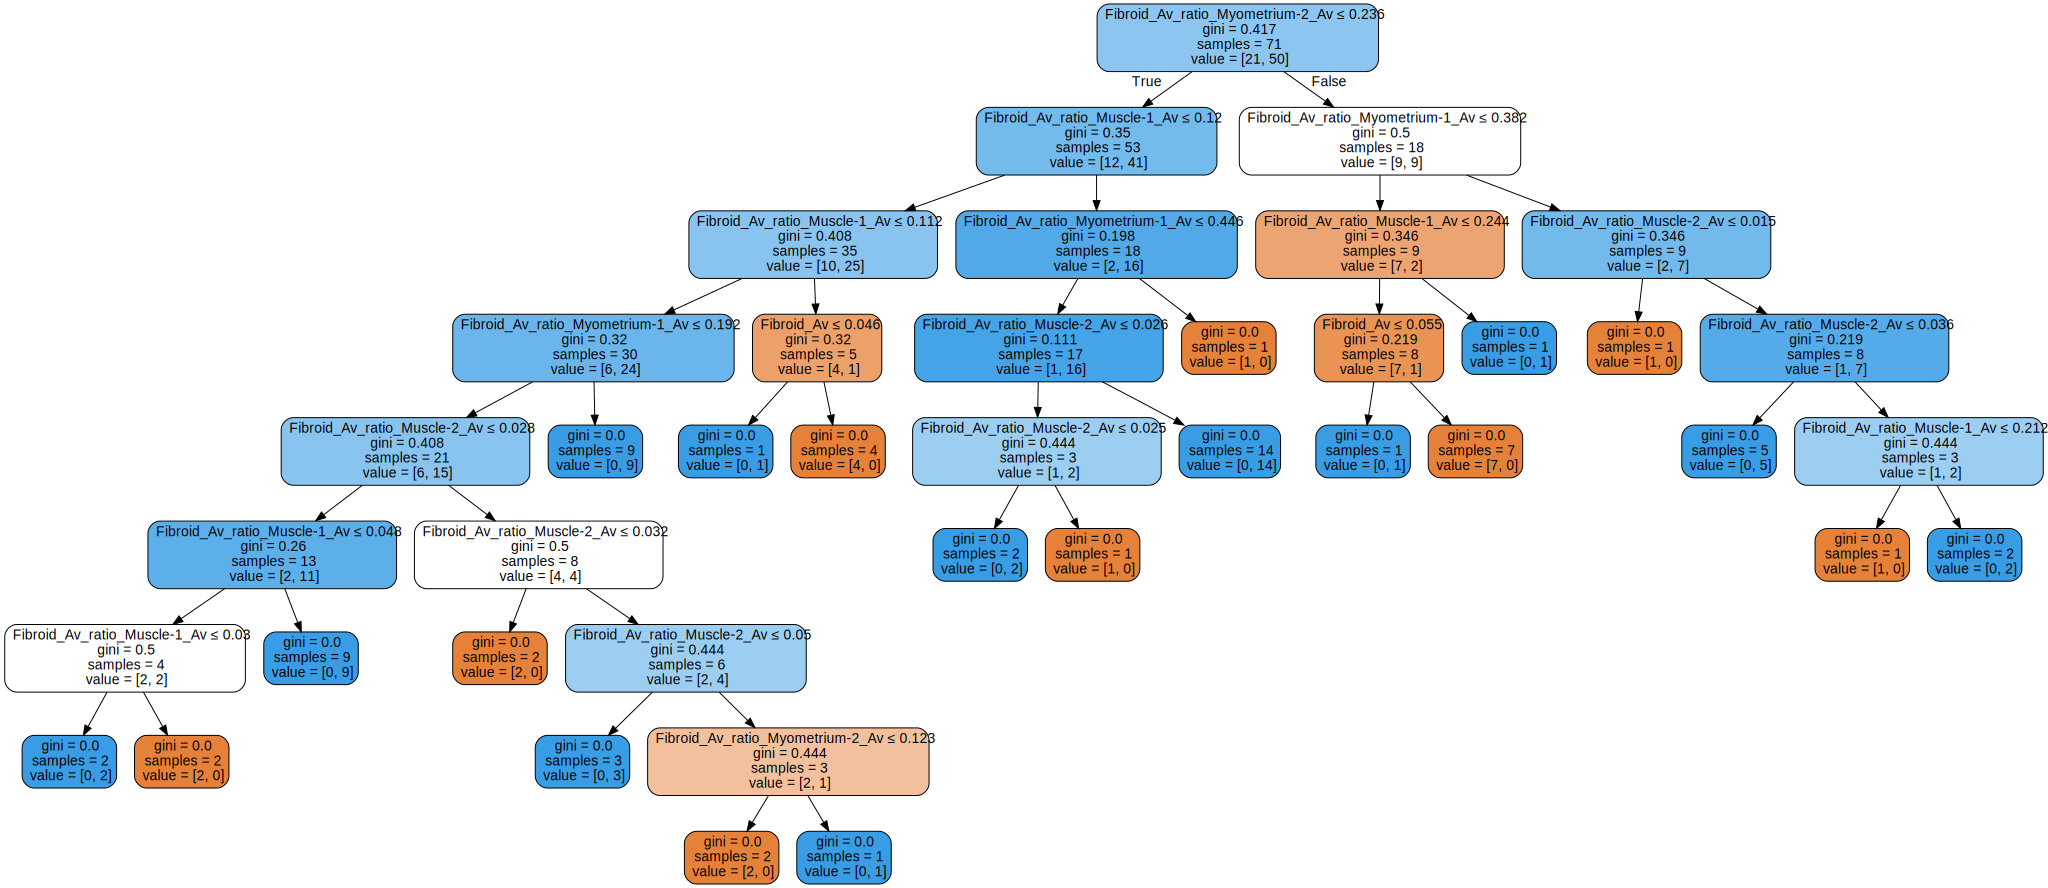

In [ ]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Corrected feature names to match the number of features in your model
feature_names = ['Fibroid_Av', 'Fibroid_Av_ratio_Myometrium-1_Av', 'Fibroid_Av_ratio_Myometrium-2_Av', 'Fibroid_Av_ratio_Muscle-1_Av', 'Fibroid_Av_ratio_Muscle-2_Av']

# Visualize the Decision Tree with the corrected feature names
dot_data = export_graphviz(decision_tree_classifier,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=feature_names)
graph = graphviz.Source(dot_data)
display(graph)



# ** **Get a Report **

In [ ]:
# print(classification_report(y_test,y_pred ),"\n\n\n\n\n\n")
# print(classification_report(y_test1,y_pred1 ), "\n\n\n\n\n\n")
# print(classification_report(y_test2,y_pred2 ))

print(y_test, "\n\n\n")
print(y_pred)


    1
30  0
0   1
22  1
31  0
18  0
28  0
10  1
70  0 



[1 1 1 1 1 1 1 0]
